# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [2]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
my_image = cv2.imread('../assets/swirl.jpg')
a_copy_of_my_image = my_image.copy()
a_copy_of_my_image.shape


(400, 400, 3)

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [3]:
# Load a color image and split in is different B, G and R channels
my_image = cv2.imread('../assets/swirl.jpg')
blue = my_image[:,:,0]
green = my_image[:,:,1]
red = my_image[:,:,2]

[Hint](# "cv2.split") 

In [4]:
# Show each channel channel on screen
def show(img):
    cv2.imshow("Image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)


show(blue)
show(green)
show(red)

#### Merging the color channels

In [5]:
# Modify a channel and then merge them all again
green = np.zeros_like(green)

merged = cv2.merge([blue, green, red])
show(merged)

[Hint](# "cv2.merge") 

In [12]:
# Create a black canvas with the same size as the image you loaded
black_canvas = np.zeros_like(my_image)
# Only want one dimension of black
black_canvas = black_canvas[:,:,0]

# show(black_canvas)
 

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [15]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine

# Putting green back to original
green = my_image[:,:,1]
# I'll use BGR as it's the default
BXX = cv2.merge([blue, black_canvas, black_canvas])
XGX = cv2.merge([black_canvas, green, black_canvas])
XXR = cv2.merge([black_canvas, black_canvas, red])

print(BXX.shape)

# show(BXX)
# show(XGX)
# show(XXR)


(400, 400, 3)


[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

In [18]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('../assets/mnms.png')
# plt.figure(figsize = (20,15));
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
# Split the H,S and V channels 
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

[Hint](# "cv2.cvtColor") 

In [29]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
blue_low_b = (85, 0, 0)
blue_up_b = (150, 255, 255)

clone = hsv.copy()
blue_mask = cv2.inRange(clone, blue_low_b, blue_up_b)
blue_masked_sweets = cv2.bitwise_and(clone,clone, mask=blue_mask)

blue_masked_sweets = cv2.cvtColor(blue_masked_sweets, cv2.COLOR_HSV2BGR)
show(blue_masked_sweets)


[Hint](# "cv2.inRange") 

In [38]:
# Repeat the same but now with the greens
green_low_b = (40, 0, 0)
green_up_b = (85, 255, 255)

clone = hsv.copy()
green_mask = cv2.inRange(clone, green_low_b, green_up_b)
green_masked_sweets = cv2.bitwise_and(clone,clone, mask=green_mask)

green_masked_sweets = cv2.cvtColor(green_masked_sweets, cv2.COLOR_HSV2BGR)
show(green_masked_sweets)

In [43]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
blue_and_green_sweets = cv2.bitwise_or(blue_masked_sweets, green_masked_sweets)
show(blue_and_green_sweets)


In [57]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image
combined = cv2.addWeighted(img, 0.25, blue_and_green_sweets, 0.75, 0)
cv2.imshow("thing",blue_and_green_sweets)
show(combined)

[Hint](# "cv2.addWeighted") 

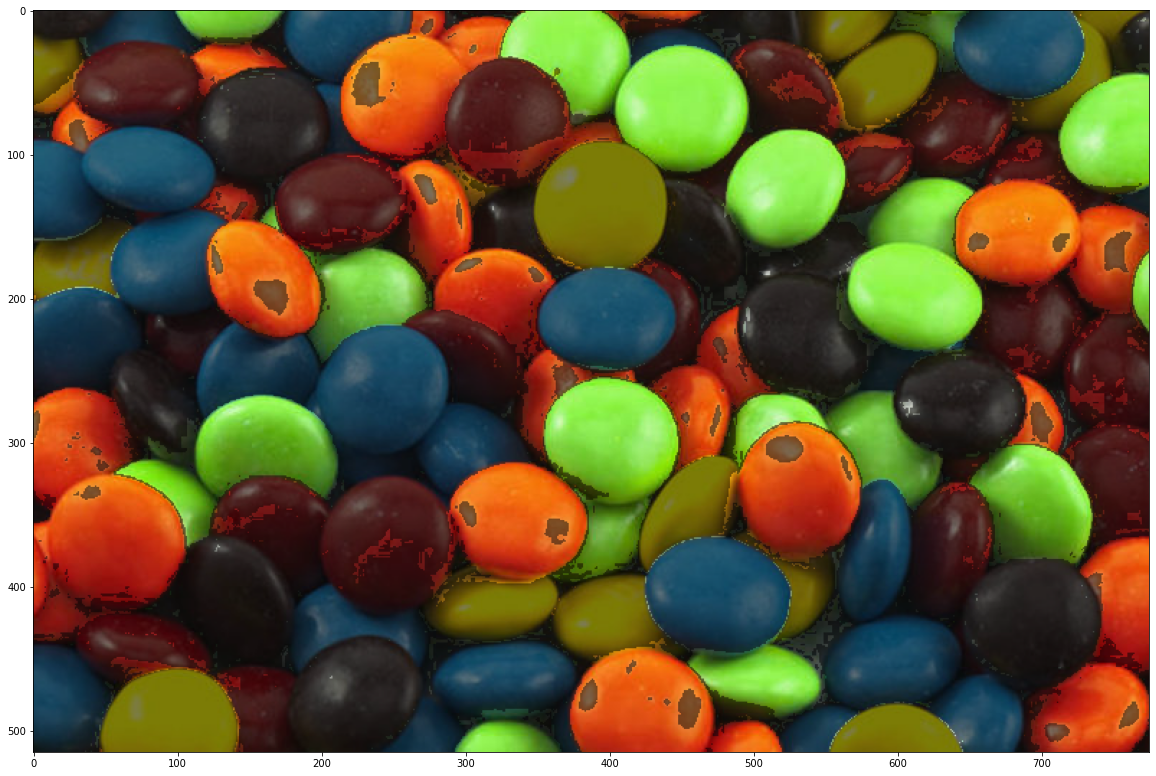

In [ ]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Color tracker

1. Given an image with an specific color on it isolate the color and only shot that item

### Level 2

#### Color tracker

1. Make it track a item in real time (either with a video or a webcam)

### Level 3

#### Color Tracker

1. Can you make it track two or more different items at the same time?